# Import 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import tyler_explore

In [53]:
df = acquire.get_survey_data('survey.csv')

In [54]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [56]:
#creating function for Linh's prepare file
def encoding_columns(df):
    #create a column list for for loop below:
    col_list= ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
    for col in col_list:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    return df


In [57]:
encoding_columns(df)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,0,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,0.0,0,1,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,0,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,0.0,1,1,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,0,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,0.0,1,1,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,0,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,0.0,0,0,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,0,NaN


# Testing Tyler's Univariate Function

In [69]:
cat_vars= ['family_history', 'treatment']

In [70]:
quant_vars =['Age']

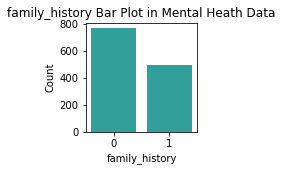

   family_history  Count  Percent
0               0    767    60.92
1               1    492    39.08
_________________________________________________________________


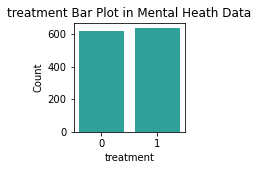

   treatment  Count  Percent
1          1    637     50.6
0          0    622     49.4
_________________________________________________________________


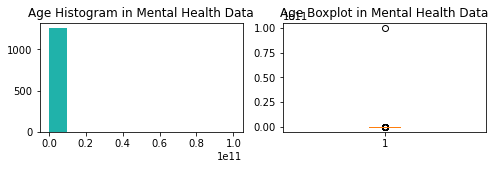

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


In [73]:
tyler_explore.explore_univariate(df, cat_vars, quant_vars)

**Note: Quantative variables Need X and Y labels**